<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/answer/03a_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 識別 ー概念学習ー

課題: wineデータで決定木の作成、表示を行ってください。また、過学習の状況および過学習への対処をコーディングで確認してください。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

まず、全学習データで決定木を作成し、表示します。

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

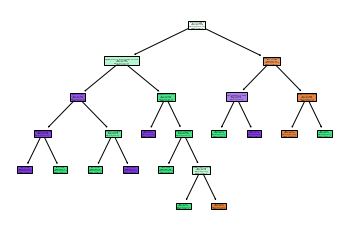

In [4]:
plot_tree(clf, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()

次に、交差確認法で性能評価を行います。

In [5]:
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.87 (+/- 0.18)


木の深さを変えてみます。

In [6]:
clf2 = DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(clf2, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.84 (+/- 0.18)


In [7]:
clf3 = DecisionTreeClassifier(max_depth=19)
scores = cross_val_score(clf3, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.88 (+/- 0.16)


デフォルトパラメータより浅い木では性能が落ちるので、デフォルトパラメータで過学習が起きているとはいえません。また、深い木に変更しても性能がほとんど変わらないので、特にデフォルトパラメータから変更する必要はないといえます。